# KNN Regression

https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

## Import libraries

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
from math import sqrt

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Files
from util import fetchOnlineData, create_dataset
from indicators import get_indicators

# TA Library (https://github.com/bukosabino/ta)
from ta import *

sns.set(font_scale = 1)

## Initial variables

In [2]:
symbol = "AABA"

# We'll look back 365 days
start_d = dt.date.today() - dt.timedelta(365)

## Import dataset

In [3]:
yesterday = dt.date.today() - dt.timedelta(1)
portf_value = fetchOnlineData(start_d, symbol, yesterday, del_cols=False)

[*********************100%***********************]  1 of 1 downloaded


In [4]:
portf_value

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-16,69.519997,69.989998,69.010002,69.919998,69.919998,3805400
2018-04-17,70.290001,71.489998,70.169998,71.089996,71.089996,14357700
2018-04-18,71.360001,72.500000,70.830002,72.320000,72.320000,7508200
2018-04-19,72.300003,72.599998,71.489998,72.019997,72.019997,8610300
2018-04-20,71.570000,72.139999,70.589996,71.059998,71.059998,6119600
2018-04-23,71.139999,71.190002,69.680000,69.889999,69.889999,19183900
2018-04-24,70.550003,70.750000,68.459999,69.260002,69.260002,3180700
2018-04-25,68.849998,68.849998,67.089996,68.269997,68.269997,4180600
2018-04-26,68.900002,69.879997,68.830002,69.800003,69.800003,4392400


# Compute indicators from TA library

It is a Technical Analysis library to financial time series datasets (open, close, high, low, volume). You can use it to do feature engineering from financial datasets.

https://github.com/kairosart/ta

In [5]:
df = add_all_ta_features(portf_value, "Open", "High", "Low", "Close", "Volume", fillna=True)

/home/emi/PycharmProjects/factors/lib/python3.7/site-packages/ta/trend.py:170: RuntimeWarning:

invalid value encountered in double_scalars

/home/emi/PycharmProjects/factors/lib/python3.7/site-packages/ta/trend.py:174: RuntimeWarning:

invalid value encountered in double_scalars

/home/emi/PycharmProjects/factors/lib/python3.7/site-packages/ta/trend.py:634: FutureWarning:

Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning

/home/emi/PycharmProjects/factors/lib/python3.7/site-packages/ta/trend.py:656: FutureWarning:

Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning



## Changing index and columns

In [6]:
# Delete unuseful columns
del df['Open']
del df['High']
del df['Low']
del df['Close']
del df['Volume']


# Create 'date' column for posterior index
df['date'] = df.index

# Rename column for correlation matrix. Can't have spaces.
df.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)

# Reset index
df.reset_index(inplace=True)

## Correlation matrix

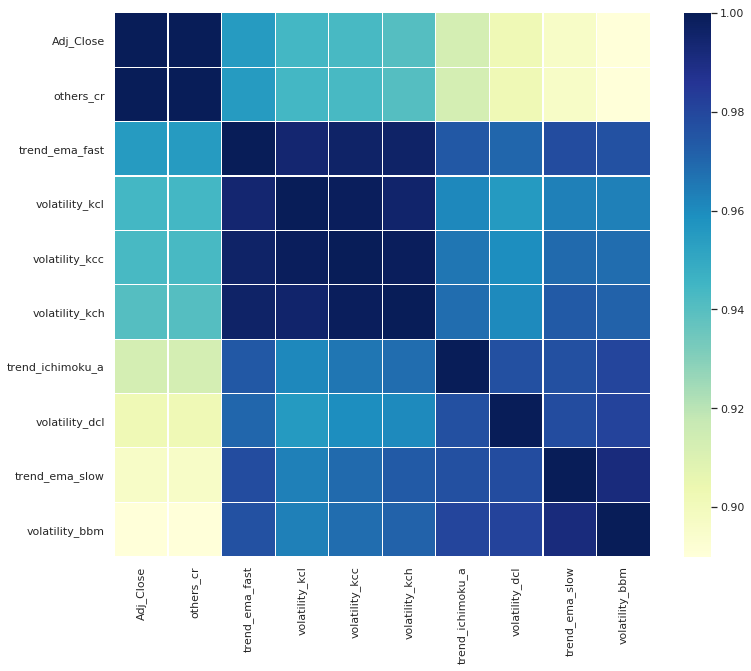

In [7]:
# Adj Close correlation matrix
corrmat = df.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Adj_Close')['Adj_Close'].index
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize =(12, 10)) 
sns.heatmap(cm, ax = ax, cmap ="YlGnBu", 
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values) 
plt.show()

## Indicators to use

* others_cr: Cumulative Return.
* trend_ema_fast: Fast Exponential Moving Averages (EMA) 
* volatility_kcl: Keltner Channel

### Create a dataframe with indicators to use

In [8]:
dataset = df[['Adj_Close', 'others_cr', 'trend_ema_fast', 'volatility_kcl']].copy()

## Setup the Target variable or the desired output.

In [9]:
# Define X and y
feature_cols = ['others_cr', 'trend_ema_fast', 'volatility_kcl']
X = dataset[feature_cols]
y = dataset['Adj_Close']

## Split the data

In [10]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=False)

## Feature Scaling

In [13]:
# Scale the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
#y_test_scaled = scaler.fit_transform(np.array(y_test).reshape(-1, 1))

In [14]:
# Scale X_test (Adj_Close)
scaler1 = MinMaxScaler(feature_range=(0, 1))
feature = df[['Adj_Close']]
y_test_scaled = scaler1.fit_transform(np.array(y_test).reshape(-1, 1))

## Have a look at the error rate for different k values

In [17]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_scaled, y_train_scaled)  #fit the model
    pred=model.predict(X_test_scaled) #make prediction on test set
    error = sqrt(mean_squared_error(y_test_scaled,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)



RMSE value for k=  1 is: 0.03726172885854299
RMSE value for k=  2 is: 0.03698163893254434
RMSE value for k=  3 is: 0.034969718478690334
RMSE value for k=  4 is: 0.03753368028032426
RMSE value for k=  5 is: 0.039109954058276164
RMSE value for k=  6 is: 0.040171066615302044
RMSE value for k=  7 is: 0.040284874889940044
RMSE value for k=  8 is: 0.041435353177457106
RMSE value for k=  9 is: 0.04087040611427684
RMSE value for k=  10 is: 0.04182459816460259
RMSE value for k=  11 is: 0.04346546934454021
RMSE value for k=  12 is: 0.04505416278084917
RMSE value for k=  13 is: 0.04533225227398867
RMSE value for k=  14 is: 0.04632478296879233
RMSE value for k=  15 is: 0.04711589530139437
RMSE value for k=  16 is: 0.04716704264159534
RMSE value for k=  17 is: 0.04823098493199897
RMSE value for k=  18 is: 0.04965865779083772
RMSE value for k=  19 is: 0.04994102665293522
RMSE value for k=  20 is: 0.050097058915719986


## Plot RMSE values

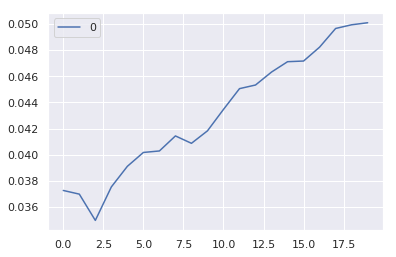

In [18]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

## Implement GridsearchCV 

In [19]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train_scaled, y_train_scaled)
model.best_params_

/home/emi/PycharmProjects/factors/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'n_neighbors': 2}

## Prediction

In [20]:
y_pred = model.predict(X_test_scaled)  

## Compute the rmse

In [21]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 68.879205


## Plotting

### Standarize data 

In [22]:

preds = scaler1.inverse_transform(y_pred)


In [23]:
# Create a dataframe for plotting
predictions = pd.DataFrame()
predictions['Price'] = y_test
predictions['Forecast'] = preds

In [24]:
# Create dates df index
df1 = df['date'].tail(len(y_test))

In [25]:
# Concatenate both dataframes
pred = pd.concat([predictions, df1], axis=1)

# Set index
pred.set_index('date', inplace=True)

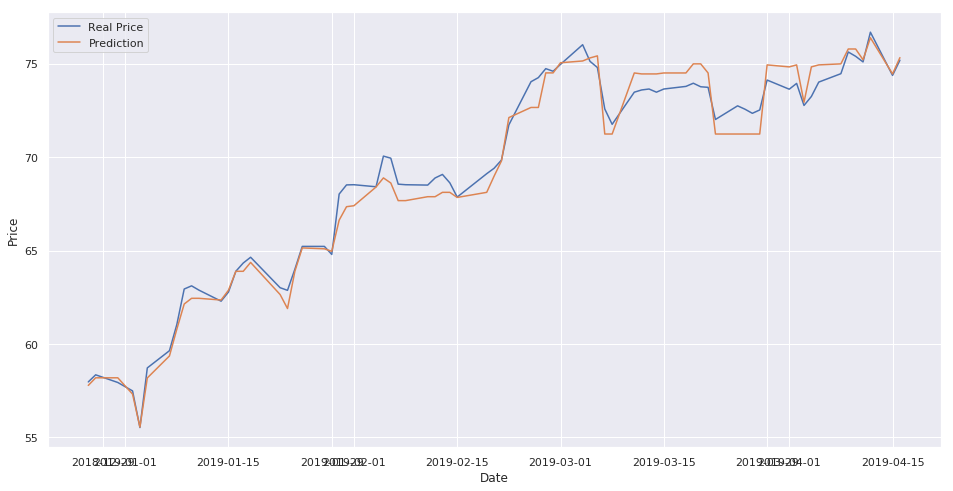

In [26]:
plt.figure(figsize=(16,8))
plt.plot(pred)
plt.xlabel('Date')
plt.ylabel("Price")
plt.legend(["Real Price", "Prediction"])
plt.show()

## Evaluate The Model

## Correlation

A way to visualize and evaluate the accuracy of a regression algorithm is to look at the relationship between predicted and actual values of our dependant variable Y.

A value along the horizontal access is the prediction and along the vertical axis is what the ground truth is.

You'll get an answer somewhere between -1 and +1. Where +1 means they're strongly correlated, -1 means they're inversely correlated, and 0 means there's essentially no correlation at all between them.


In [27]:
print('Correlation: \n', np.corrcoef(predictions['Forecast'], predictions['Price']))

Correlation: 
 [[1.         0.99145612]
 [0.99145612 1.        ]]


### Plot correlation matrix

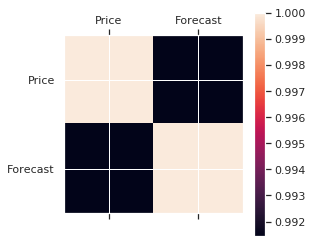

In [28]:
plt.matshow(predictions.corr())
plt.xticks(range(len(predictions.columns)), predictions.columns)
plt.yticks(range(len(predictions.columns)), predictions.columns)
plt.colorbar()
plt.show()

### Plot slope line and elipse

So if it's a nice oval that fits close to the slope line, we usually have a high correlation. If it's a big round thing we've got poor correlation.


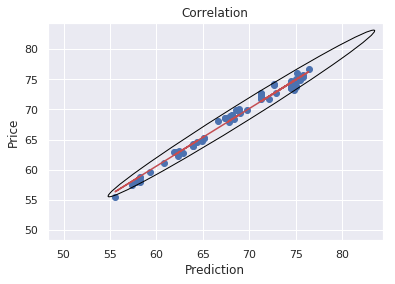

In [30]:
# Slope line
a = predictions['Forecast']
b = predictions['Price']
# Find the slope and intercept of the best fit line
slope, intercept = np.polyfit(a, b, 1)

# Create a list of values in the best fit line
abline_values = [slope * i + intercept for i in a]

# Create an ellipse
cov = np.cov(a, b)
lambda_, v = np.linalg.eig(cov)
lambda_ = np.sqrt(lambda_)

ax = plt.subplot(111, aspect='auto')

ell = Ellipse(xy=(np.mean(a), np.mean(b)),
              width=lambda_[0]*5, height=lambda_[1]*5,
              angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='black')
ell.set_facecolor('none')

# Max and min values for lim
maxlim = max(b) * 1.1
minlim = min(b) / 1.15
ax.add_artist(ell)
ax.set(xlim=[minlim, maxlim], ylim=[minlim, maxlim])

plt.scatter(a, b)
plt.plot(a, abline_values, 'r')
plt.title("Correlation")
plt.xlabel('Prediction')
plt.ylabel("Price")
plt.show()



### Note

Correlation has to do with how well aligned the points are with the line that we fit.

So if it's a nice oval that fits close to that line, we usually have a high correlation. If it's a big round thing we've got poor correlation.


## Save the model

In [31]:
# save model to file
print("Pickling sklearn API models")
# must open in binary format to pickle
pickle.dump(model, open("./knn.pkl", "wb"))

Pickling sklearn API models


In [32]:
# load model
model1 = pickle.load(open("./knn.pkl", "rb"))

In [33]:
model1.predict(X_test_scaled)

array([[0.10651431],
       [0.12579544],
       [0.12579544],
       [0.08461243],
       [0.00112312],
       [0.12542112],
       [0.18101822],
       [0.24878318],
       [0.31242968],
       [0.32684385],
       [0.32684385],
       [0.32253844],
       [0.34724812],
       [0.39517021],
       [0.39517021],
       [0.41763365],
       [0.33639088],
       [0.30101081],
       [0.39535747],
       [0.45432415],
       [0.45207776],
       [0.44571318],
       [0.52452258],
       [0.55859221],
       [0.5610257 ],
       [0.60838623],
       [0.63141139],
       [0.61849484],
       [0.57394227],
       [0.57394227],
       [0.58386363],
       [0.58386363],
       [0.59490826],
       [0.59490826],
       [0.58199169],
       [0.59490826],
       [0.63590403],
       [0.67446648],
       [0.78397599],
       [0.80962175],
       [0.80962175],
       [0.89704228],
       [0.89704228],
       [0.92268802],
       [0.92718083],
       [0.93485591],
       [0.94009738],
       [0.742